In [1]:
!pip install sidetable

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install pivottablejs

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

import sidetable
#df.stb.freq(['City'], style=True)

In [4]:
#import dataset
df= pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.stb.freq(['Address'], style=True)

,Address,count,percent,cumulative_count,cumulative_percent
0,Unit 9871 Box 9037 DPO AP 37275-9289,1,0.02%,1,0.02%
1,Unit 9831 Box 7128 DPO AA 54705,1,0.02%,2,0.04%
2,Unit 9785 Box 0790 DPO AP 60371-0797,1,0.02%,3,0.06%
3,Unit 9778 Box 2114 DPO AP 59374,1,0.02%,4,0.08%
4,Unit 9774 Box 4511 DPO AE 44963,1,0.02%,5,0.10%
5,Unit 9732 Box 1846 DPO AE 69898-3304,1,0.02%,6,0.12%
6,Unit 9664 Box 1605 DPO AA 30902,1,0.02%,7,0.14%
7,Unit 9494 Box 2307 DPO AE 58622,1,0.02%,8,0.16%
8,Unit 9463 Box 0963 DPO AE 49984-2796,1,0.02%,9,0.18%
9,Unit 9446 Box 0958 DPO AE 97025,1,0.02%,10,0.20%


In [9]:
# drop address column
df= df.iloc[:,0:-1]
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


## Preprocession steps

|Sr.No.| Step | Option 1 | Option 2 |
|---| --- | --- | --- |
|1| Missing value | info | isnull |
|2| Encoding |  |  |
|3| Outlier | boxplot |  |
|4| Feature scaling |  |  |
|5| Imbalance |  |  |

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


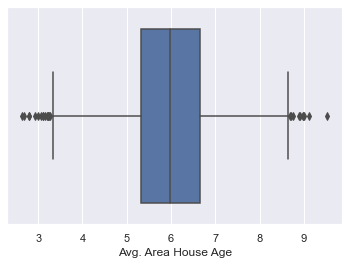

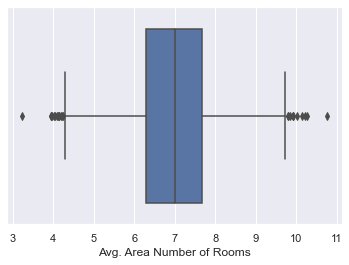

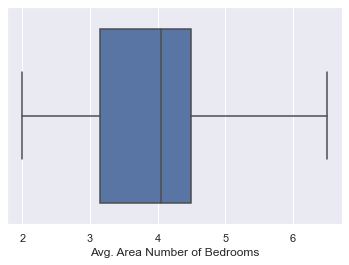

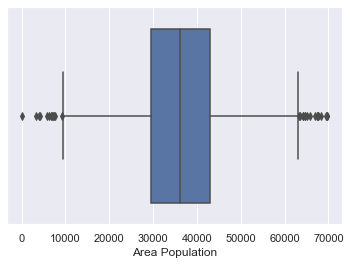

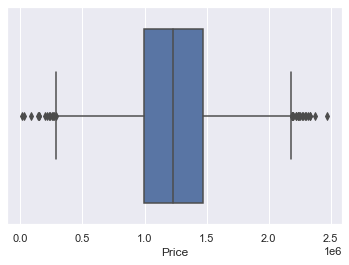

In [11]:
# Plot boxplot to detect outlier
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.columns)[1:]:
    boxplot(i)

<AxesSubplot:xlabel='Price', ylabel='Density'>

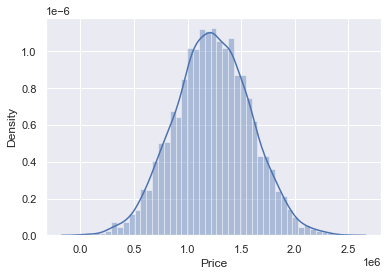

In [12]:
# Check distribution of dependent variable
sns.distplot(df['Price'])

In [13]:
# Remove outliers
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR= Q3-Q1
pos_outlier= Q3+1.5*IQR
neg_outlier= Q1-1.5*IQR

In [14]:
df= df[~((df<neg_outlier)|(df>pos_outlier)).any(axis=1)]

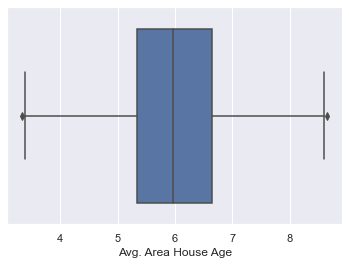

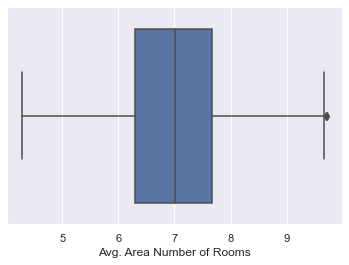

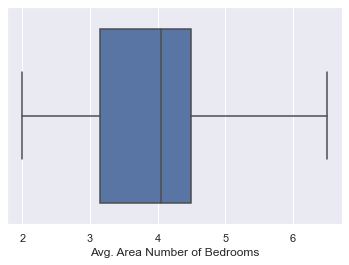

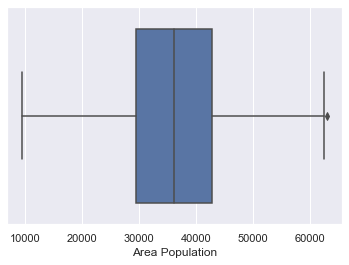

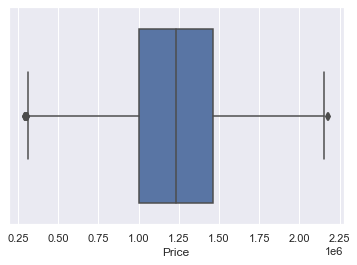

In [15]:
# Plot boxplot to detect outlier
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.columns)[1:]:
    boxplot(i)

## For regression problem

|Sr.No.| Check | Option 1 | Option 2 |
|---| --- | --- | --- |
|1| multi collinearity | heatmap | VIF |
|2| auto correlation | Durbin Watson test |  |

<AxesSubplot:>

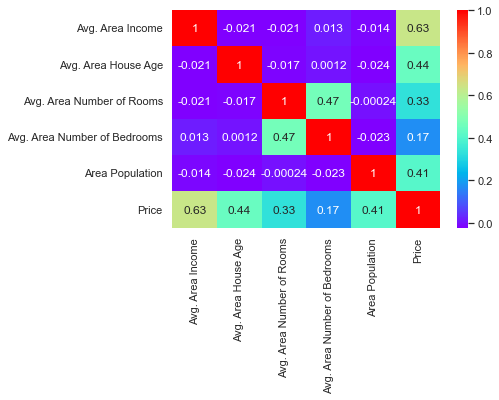

In [16]:
# Check multi collinearity
sns.heatmap(df.corr(), annot=True, cmap='rainbow')

In [17]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [18]:
# Split df into x and y
x= df.iloc[:, 0:-1]
y= df['Price']

In [21]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

In [22]:
pd.DataFrame(x_scaled)

,0,1,2,3,4
0,1.060718,-0.303632,0.022909,0.085964,-1.352403
1,1.031915,0.027759,-0.259788,-0.723717,0.420799
2,-0.711086,-0.114111,1.549834,0.928033,0.079271
3,-0.511360,1.255143,-1.421675,-0.586071,-0.187641
4,-0.837711,-0.968724,0.866021,0.199320,-1.013324
...,...,...,...,...,...
4860,-0.780870,1.920048,-0.862483,-0.424135,-1.378290
4861,0.958419,1.059334,-0.416242,0.029287,-1.089912
4862,-0.506949,1.319710,-2.215480,-1.501012,-0.295997
4863,-0.059530,-0.457372,0.145746,1.179035,0.675323


In [23]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable= x_scaled

vif= pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['Features']= x.columns
vif

,VIF,Features
0,1.001776,Avg. Area Income
1,1.001451,Avg. Area House Age
2,1.280194,Avg. Area Number of Rooms
3,1.280126,Avg. Area Number of Bedrooms
4,1.001448,Area Population


In [24]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.8, random_state=1)

In [25]:
# Build a linear model by OLS

from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [26]:
reg_model= smf.OLS(endog= y_train, exog= x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          2.284e+04
Date:                Tue, 29 Nov 2022   Prob (F-statistic):                        0.00
Time:                        23:18:45   Log-Likelihood:                         -53602.
No. Observations:                3892   AIC:                                  1.072e+05
Df Residuals:                    3887   BIC:                                  1.072e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                 9.9584      0.298     33.456      0.000       9.375      10.542
Avg. Area House Age           5.449e+04   3315.383     16.436      0.000     4.8e+04     6.1e+04
Avg. Area Number of Rooms    -1.049e+04   3630.561     -2.890      0.004   -1.76e+04   -3373.479
Avg. Area Number of Bedrooms  5922.9078   3392.207      1.746      0.081    -727.768    1.26e+04
Area Population                  8.0351      0.366     21.981      0.000       7.318       8.752
==============================================================================
Omnibus:                       10.570   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                8.677
Skew:                          -0.029   Prob(JB):                       0.0131
Kurtosis:                       2.776   Cond. No.                     9.48e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Auto correlation value is between 1.5 to 2.5, so there is not Auto correlation (Durbin-Watson test).

In [27]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

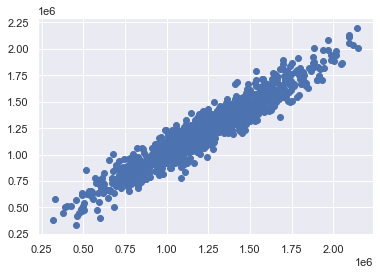

In [28]:
y_pred= model.predict(x_test)
plt.scatter(y_test, y_pred)